In [170]:
import matplotlib.pyplot as plt
import os
import json
import numpy as np
from prettytable import PrettyTable

In [171]:
def read_experiment_data(folder_path, file_name):
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)
    else:
        print(f"File '{file_name}' does not exist.")
    return data

def read_all_experiments_data(params):
    folder_path = f'./experiments/{params}'
    combined_data = {}

    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                key = filename[:-5]
                combined_data[key] = data
    return combined_data

In [172]:
def print_table(data):
    table = PrettyTable()
    table.field_names = ["Arrival Rate", "Avg Time Spent", "Max Time Spent", "Avg Queue Size"]

    for arrival_rate in ['0.5', '0.7', '0.8', '0.9', '0.95', '0.99', '0.999']:
        avg_time_spent = np.mean(data[arrival_rate]['avg_time_spent'])
        max_time_spent = np.mean(data[arrival_rate]['max_time_spent'])
        avg_queue_size = np.mean(data[arrival_rate]['avg_queue_size'])
        table.add_row([arrival_rate, avg_time_spent, max_time_spent, avg_queue_size])

    table.align = "r"
    table.float_format = ".2"
    print(table)

def print_combined_table(combined_data):
    table = PrettyTable()
    table.field_names = ["Scenario", "Arrival Rate", "Avg Time Spent", "Max Time Spent", "Avg Queue Size"]
    scenarios = ['s1_uss', 's1_uss_d2', 's1_uss_d3', 's1_uss_d5', 's2_uss', 's2_uss_d2', 's2_uss_d3', 's2_uss_d5']

    for scenario in scenarios:
        table.add_row([scenario, '', '', '', ''])
        for arrival_rate in ['0.5', '0.7', '0.8', '0.9', '0.95', '0.99', '0.999']:
            avg_time_spent = np.mean(combined_data[scenario][arrival_rate]['avg_time_spent'])
            max_time_spent = np.mean(combined_data[scenario][arrival_rate]['max_time_spent'])
            avg_queue_size = np.mean(combined_data[scenario][arrival_rate]['avg_queue_size'])
            table.add_row(['', arrival_rate, avg_time_spent, max_time_spent, avg_queue_size])
        table.add_row(['', '', '', '', ''])
    
    table.align = "r"
    table.float_format = ".2"
    print(table)    

In [204]:
def plot(data):
    
    plt.figure(figsize=(14, 7))
    for arrival_rate in ['0.5', '0.7', '0.8', '0.9', '0.95', '0.99', '0.999']:
        plt.plot(data[arrival_rate]['avg_time_spent'][50:], label=f'lambda: {arrival_rate}')
    
    plt.xticks(fontproperties='Arial', fontsize=9)
    plt.yticks(fontproperties='Arial', fontsize=9)
    plt.xlabel('Experiment', fontsize='9')
    plt.ylabel('Average time spent in the system', fontsize='9')
    plt.legend(fontsize='9')
    plt.show()

    plt.figure(figsize=(14, 7))
    for arrival_rate in ['0.5', '0.7', '0.8', '0.9', '0.95', '0.99', '0.999']:
        plt.scatter(*zip(*data[arrival_rate]['server_speed_to_load']), s=2, label=f'lambda: {arrival_rate}')
    
    plt.xticks(fontproperties='Arial', fontsize=9)
    plt.yticks(fontproperties='Arial', fontsize=9)
    plt.xlabel('Server speed', fontsize='9')
    plt.ylabel('Server load', fontsize='9')
    plt.legend(fontsize='9')
    plt.show()

def plot_combined(combined_data):
    scenarios = ['s1_uss', 's1_uss_d2', 's1_uss_d3', 's1_uss_d5', 's2_uss', 's2_uss_d2', 's2_uss_d3', 's2_uss_d5']

    for arrival_rate in ['0.5', '0.7', '0.8', '0.9', '0.95', '0.99', '0.999']:
        plt.figure(figsize=(14, 7))
        for scenario in scenarios:
            plt.plot(combined_data[scenario][arrival_rate]['avg_time_spent'], label=f'scenario: {scenario}')

        plt.xticks(fontproperties='Arial', fontsize=9)
        plt.yticks(fontproperties='Arial', fontsize=9)
        plt.xlabel('Experiment', fontsize='9')
        plt.ylabel('Average time spent in the system', fontsize='9')
        plt.title(f'Lambda = {arrival_rate}')
        plt.legend(fontsize='9')
        plt.show()

In [190]:
def boxplot(data):
    data_list = []
    
    for arrival_rate in ['0.5', '0.7', '0.8', '0.9', '0.95', '0.99', '0.999']:
        avg_time_spent = data[arrival_rate]['avg_time_spent']
        data_list.append(avg_time_spent)
    
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.boxplot(data_list, widths=0.3, showfliers=False)
    ax.set_xticklabels(['0.5', '0.7', '0.8', '0.9', '0.95', '0.99', '0.999'], fontproperties='Arial', fontsize=9)
    ax.set_xlabel('Lambda', fontproperties='Arial', fontsize=9)
    ax.set_ylabel('Average time spent in the system', fontproperties='Arial', fontsize=9)
    ax.set_title('Boxplot of avgerage time spent in the system for different lambda\'s', fontproperties='Arial', fontsize=9)
    plt.show()

In [191]:
def results(data):
    print_table(data)
    plot(data)
    boxplot(data)

In [192]:
folder_path = './experiments/1.0_100_10000_1000/'

# Pierwszy scenariusz

### Identyczne serwery i zadania

#### a) jednostajny wybór serwera

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |           2.35 |           4.81 |          25.03 |
|          0.7 |           2.61 |           5.96 |          38.13 |
|          0.8 |           2.74 |           6.55 |          45.28 |
|          0.9 |           2.89 |           7.14 |          52.84 |
|         0.95 |           2.96 |           7.43 |          56.65 |
|         0.99 |           3.02 |           7.65 |          59.69 |
|        0.999 |           3.03 |           7.70 |          60.38 |
+--------------+----------------+----------------+----------------+


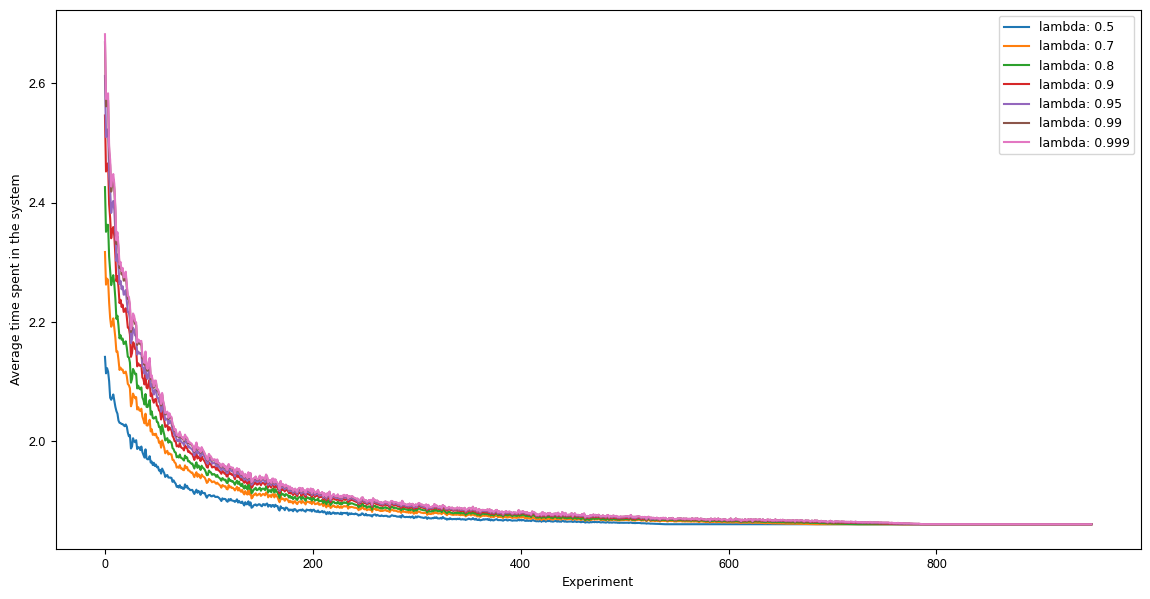

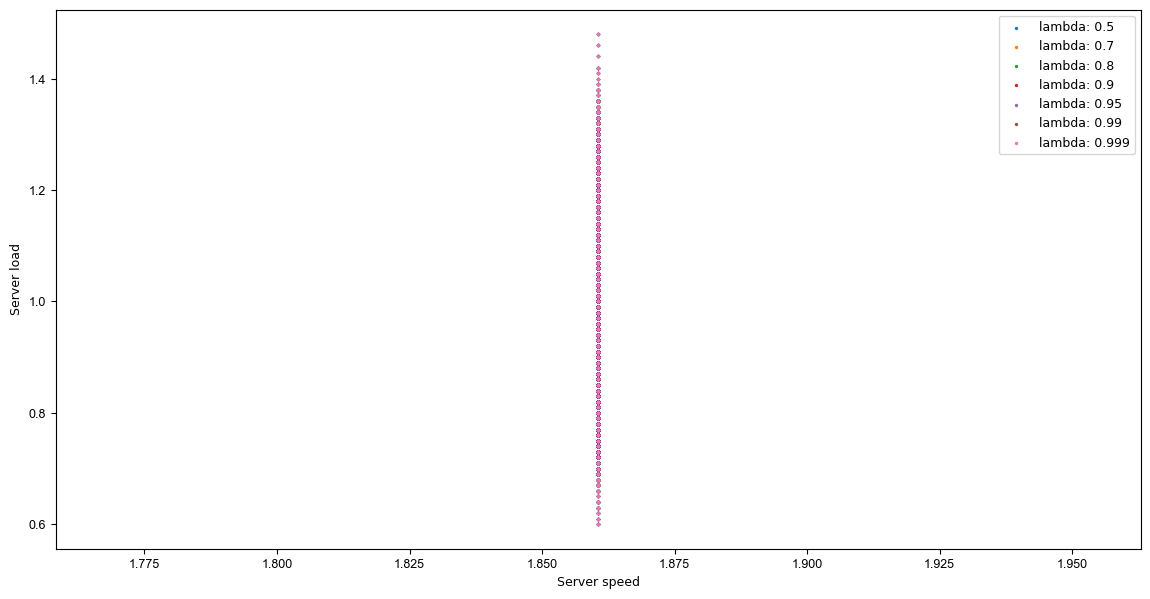

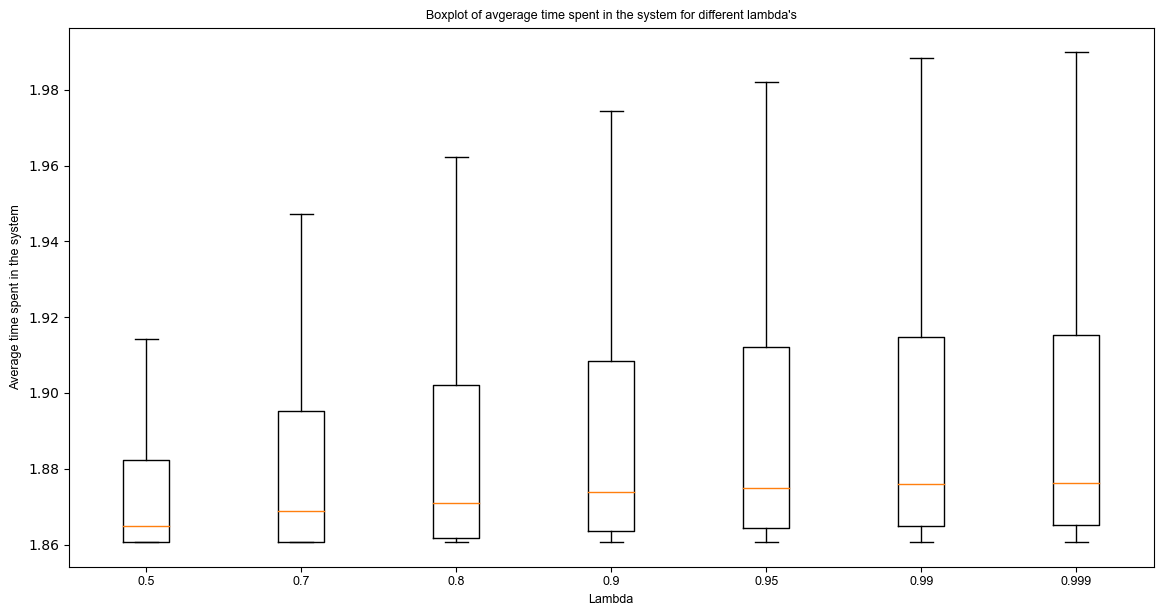

In [193]:
results(read_experiment_data(folder_path, 's1_uss.json'))

#### b) wybór mniej obciążonego z 2 jednostajnie wybranych serwerów

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |           2.28 |           3.26 |          23.07 |
|          0.7 |           2.49 |           3.82 |          34.45 |
|          0.8 |           2.62 |           4.14 |          41.12 |
|          0.9 |           2.75 |           4.48 |          48.38 |
|         0.95 |           2.82 |           4.64 |          52.12 |
|         0.99 |           2.87 |           4.78 |          55.12 |
|        0.999 |           2.89 |           4.81 |          55.78 |
+--------------+----------------+----------------+----------------+


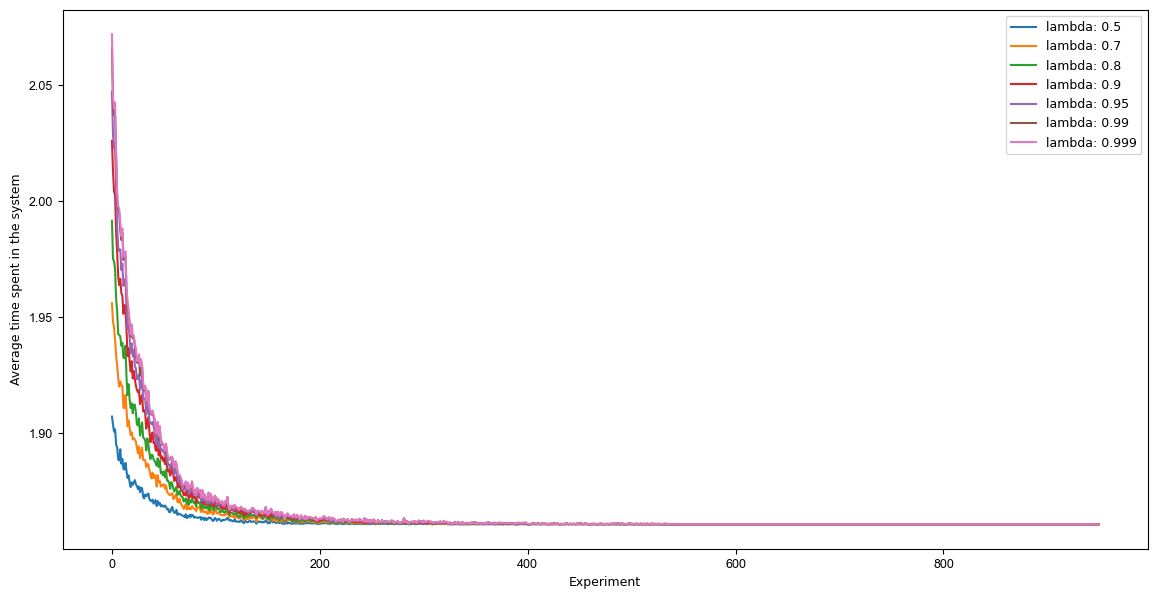

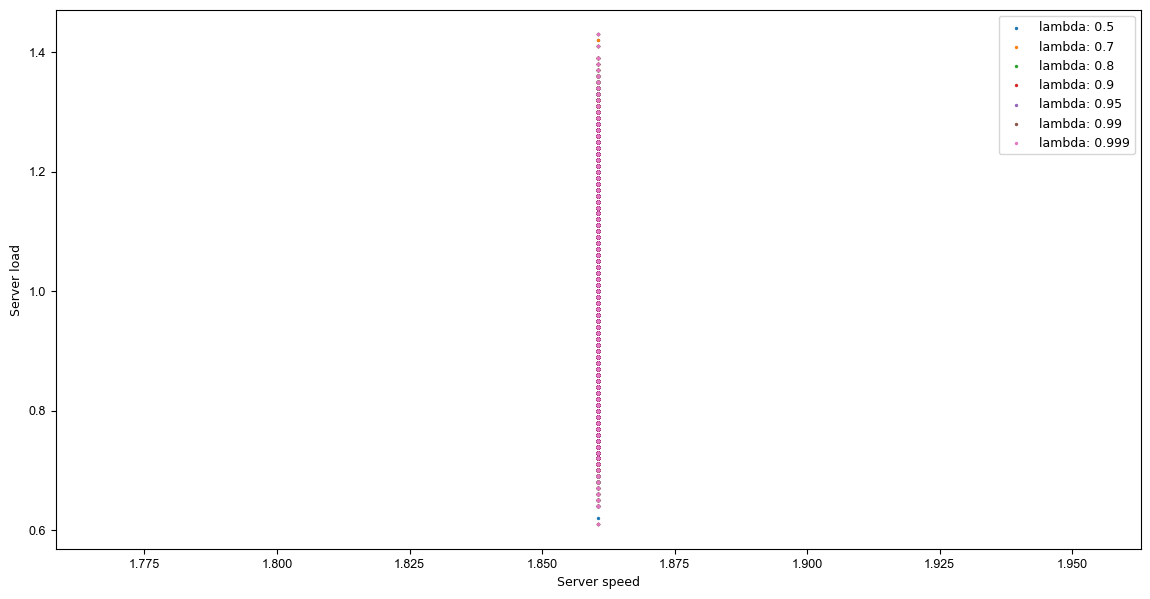

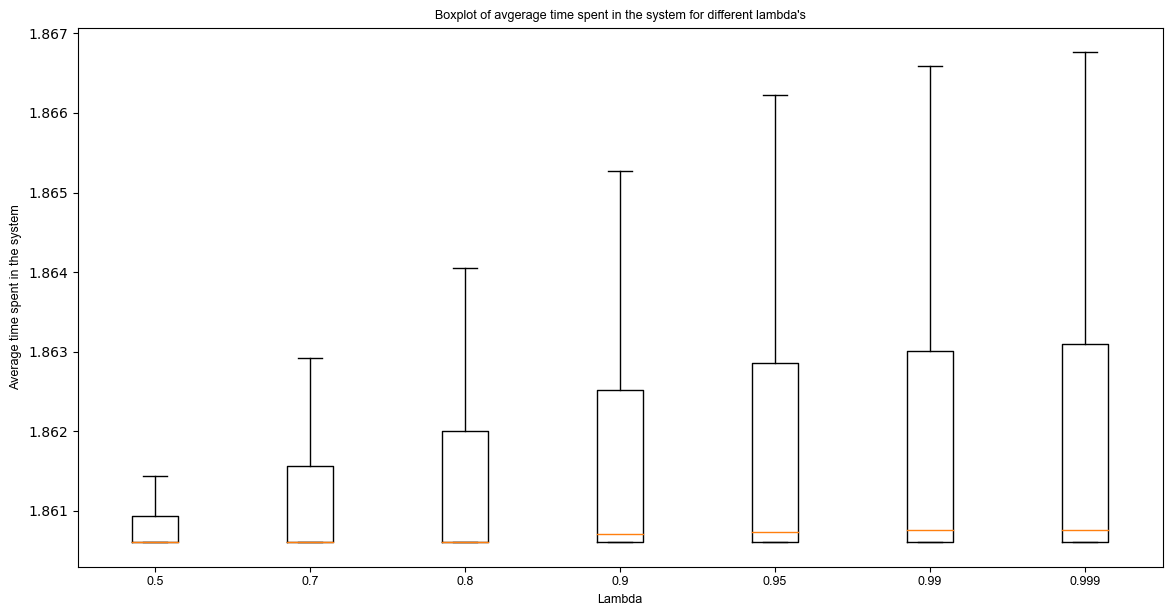

In [194]:
results(read_experiment_data(folder_path, 's1_uss_d2.json'))

#### c) wybór mniej obciążonego z d jednostajnie wybranych serwerów

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |           2.28 |           2.94 |          22.63 |
|          0.7 |           2.48 |           3.43 |          33.73 |
|          0.8 |           2.60 |           3.71 |          40.31 |
|          0.9 |           2.73 |           4.02 |          47.51 |
|         0.95 |           2.80 |           4.18 |          51.23 |
|         0.99 |           2.86 |           4.30 |          54.22 |
|        0.999 |           2.87 |           4.33 |          54.88 |
+--------------+----------------+----------------+----------------+


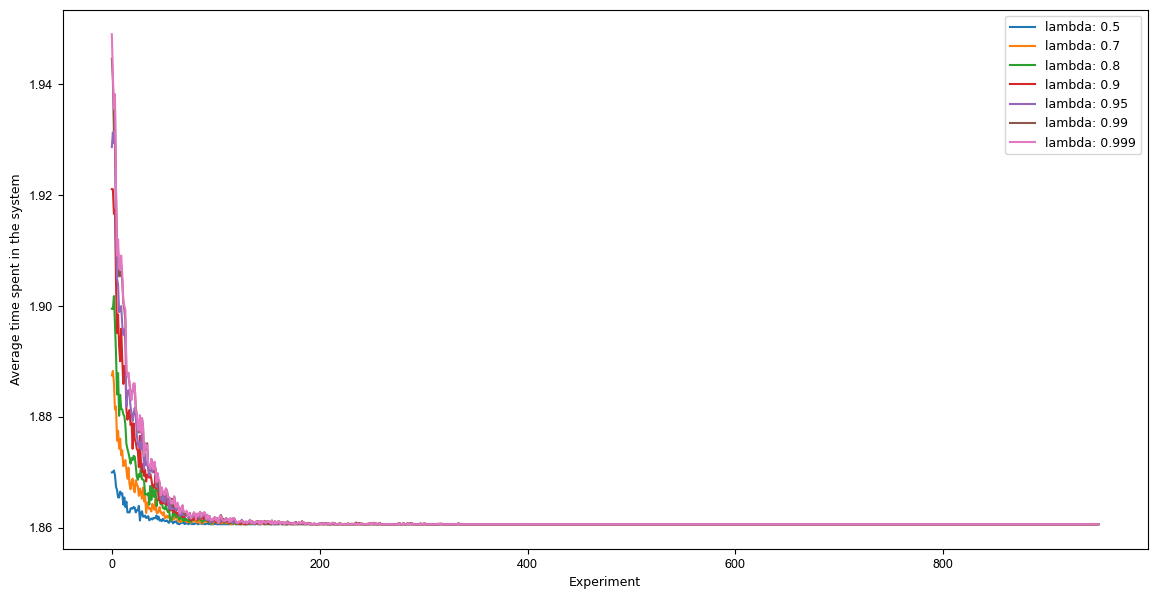

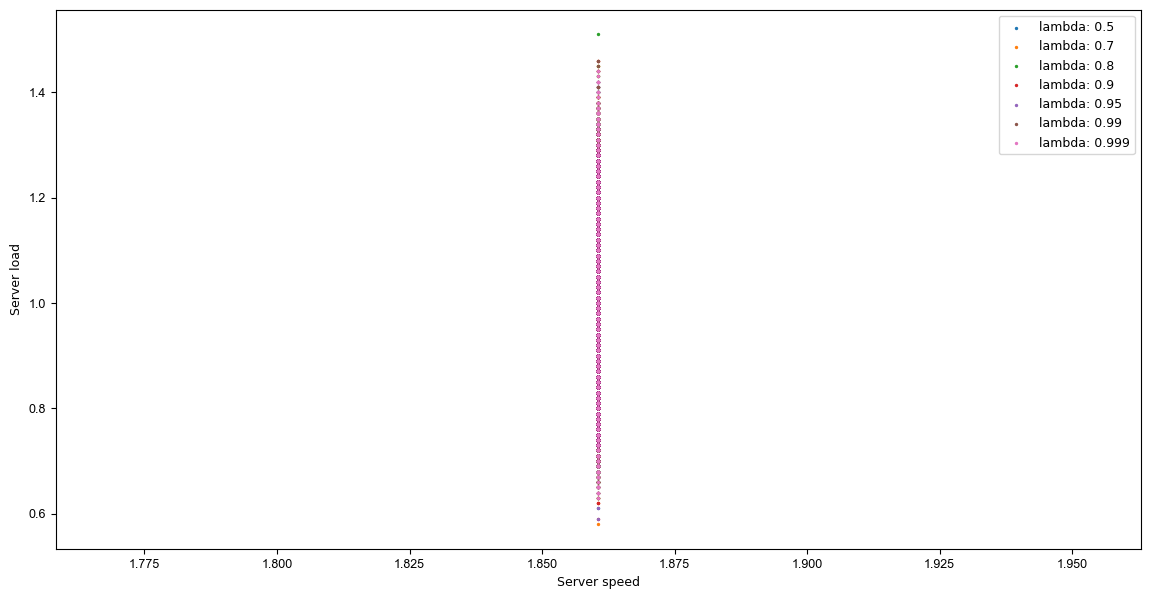

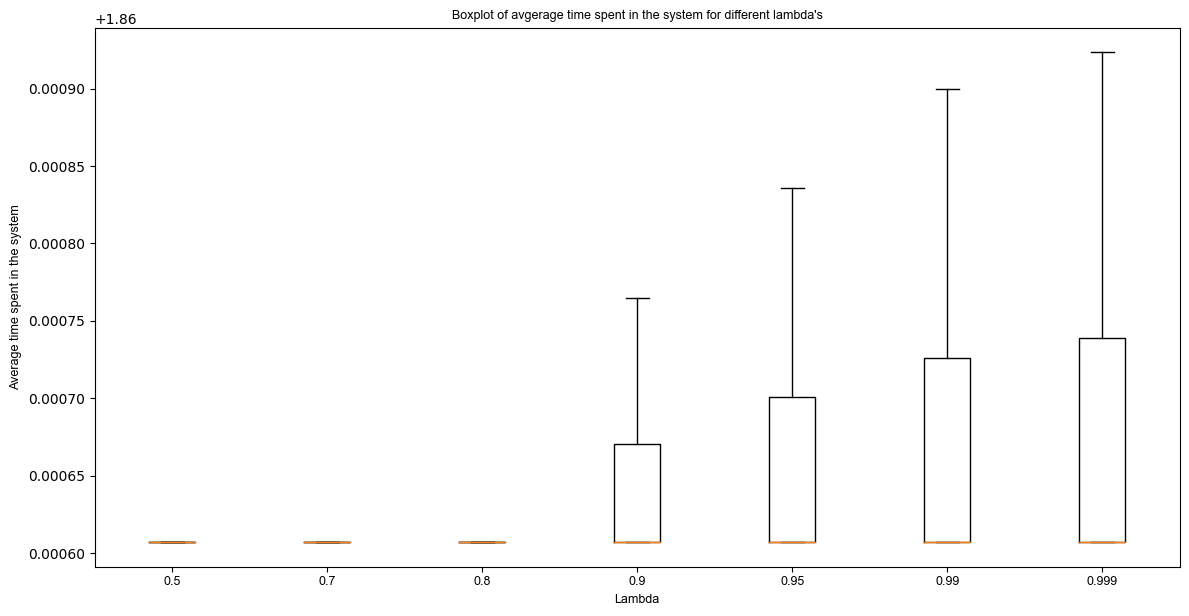

In [195]:
results(read_experiment_data(folder_path, 's1_uss_d3.json'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |           2.27 |           2.79 |          22.38 |
|          0.7 |           2.47 |           3.23 |          33.31 |
|          0.8 |           2.59 |           3.48 |          39.84 |
|          0.9 |           2.72 |           3.76 |          47.00 |
|         0.95 |           2.79 |           3.91 |          50.71 |
|         0.99 |           2.85 |           4.02 |          53.72 |
|        0.999 |           2.86 |           4.05 |          54.36 |
+--------------+----------------+----------------+----------------+


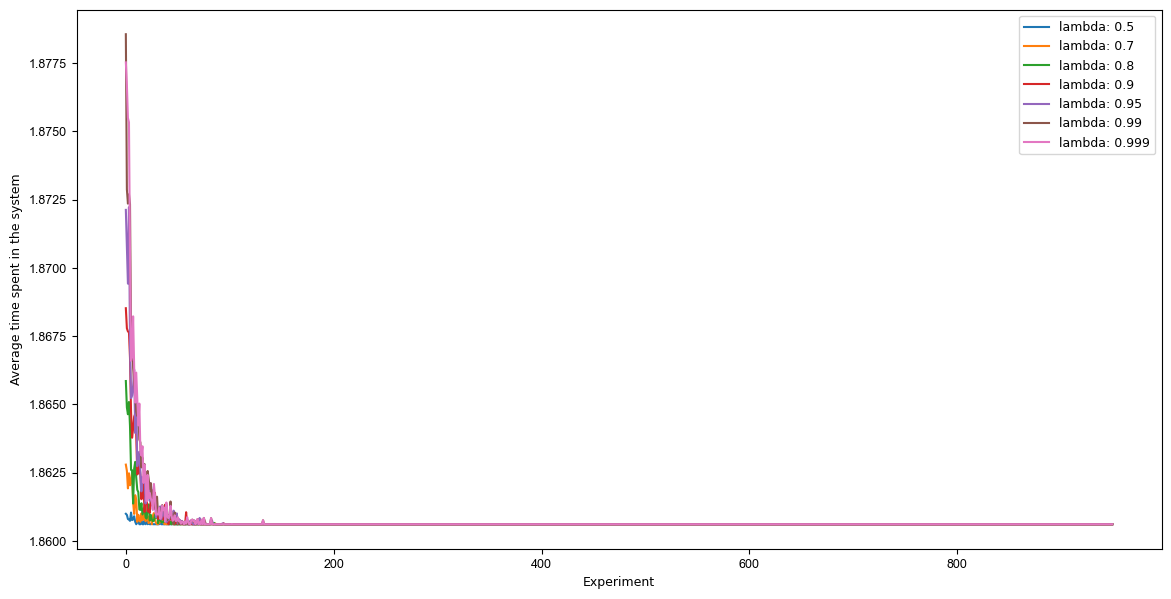

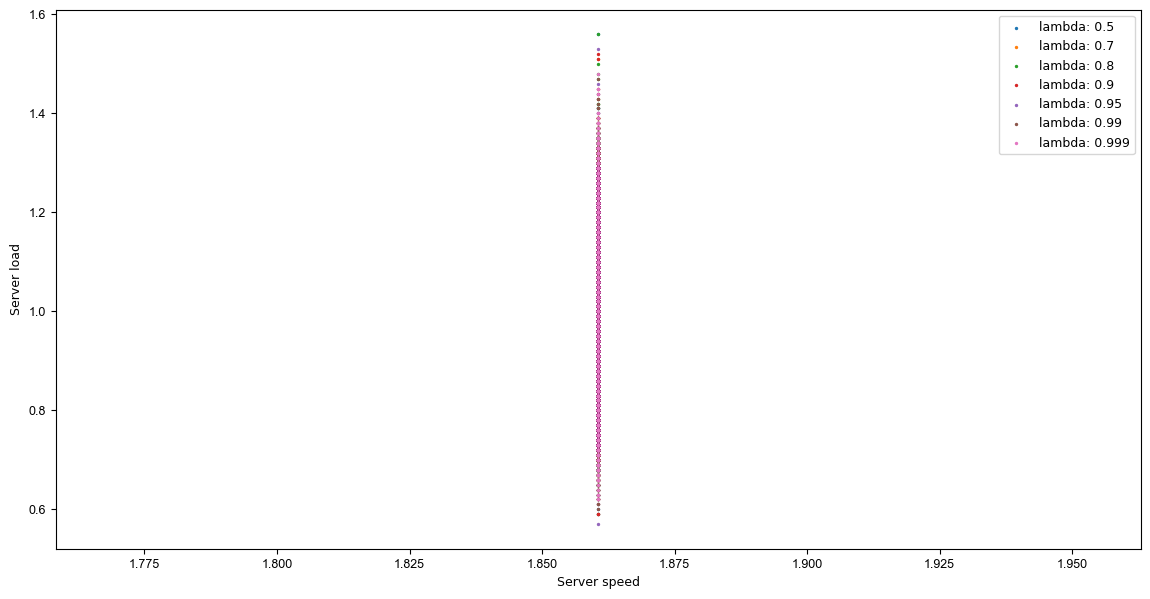

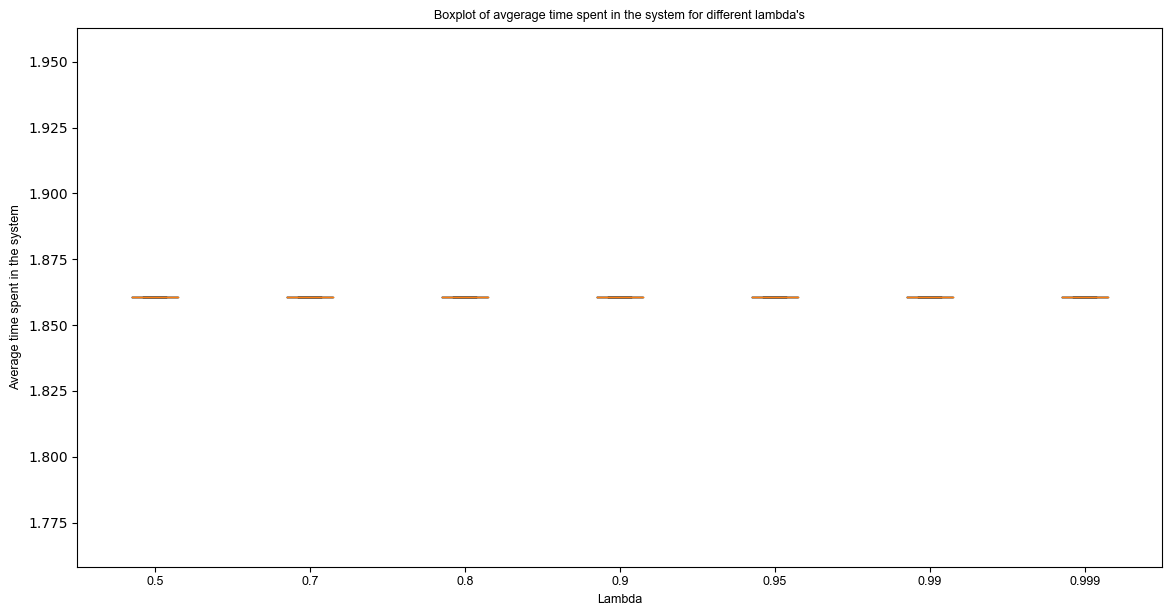

In [196]:
results(read_experiment_data(folder_path, 's1_uss_d5.json'))

# Drugi scenariusz

### Serwery o różnej szybkości, takie same zadania

#### a) jednostajny wybór serwera

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |           1.30 |          19.57 |          12.18 |
|          0.7 |           1.46 |          24.40 |          19.27 |
|          0.8 |           1.53 |          26.51 |          22.71 |
|          0.9 |           1.62 |          28.25 |          26.77 |
|         0.95 |           1.65 |          29.36 |          28.26 |
|         0.99 |           1.68 |          30.17 |          29.77 |
|        0.999 |           1.67 |          30.39 |          29.89 |
+--------------+----------------+----------------+----------------+


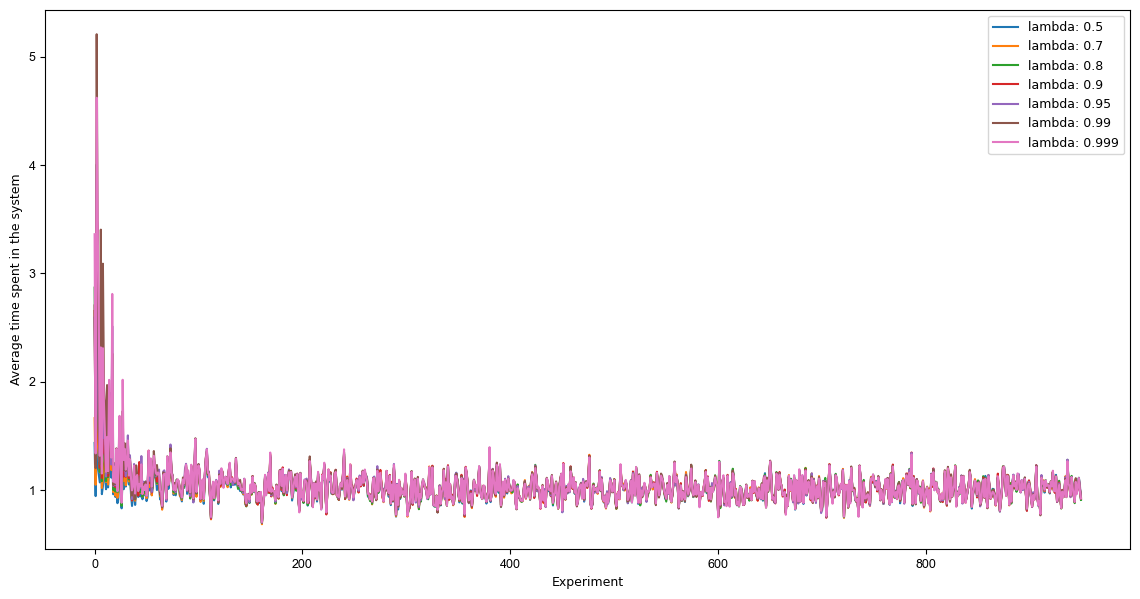

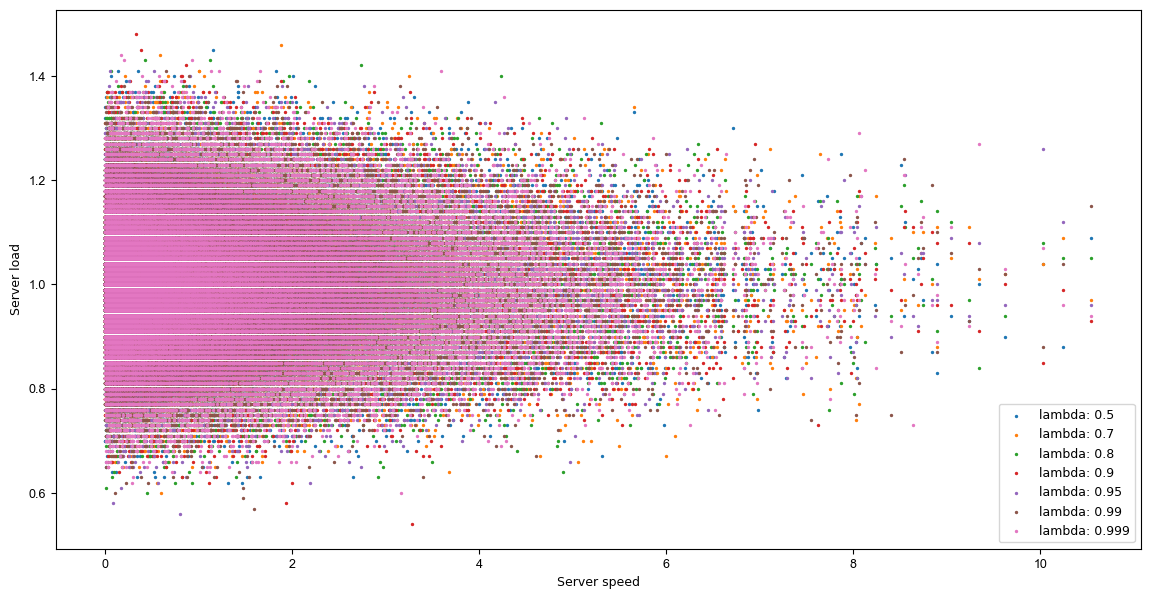

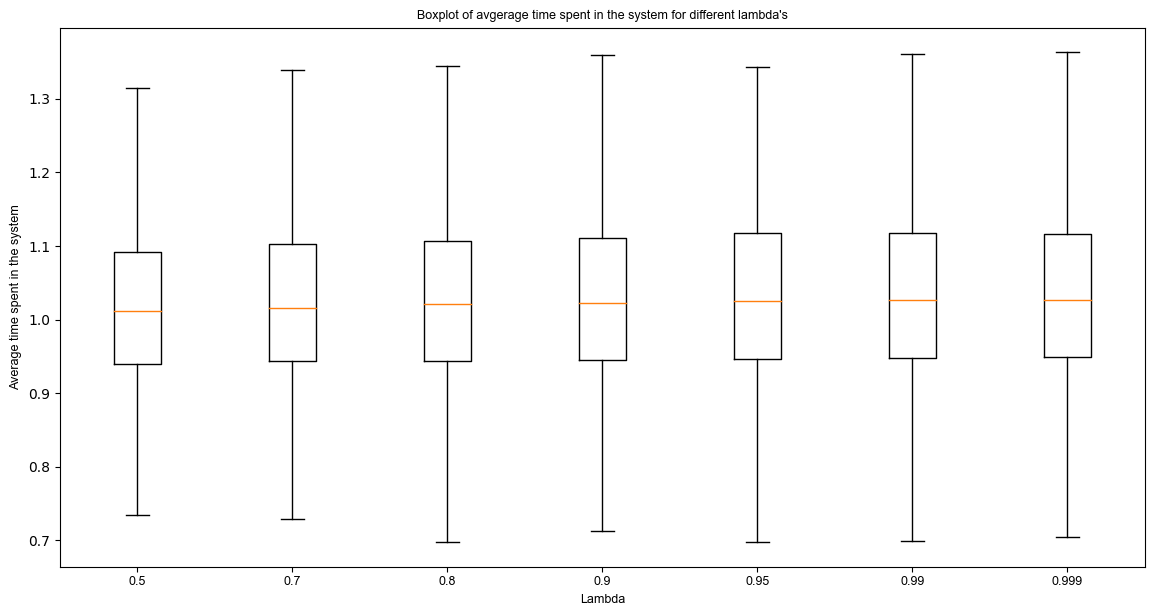

In [197]:
results(read_experiment_data(folder_path, 's2_uss.json'))

#### b) wybór mniej obciążonego z 2 jednostajnie wybranych serwerów

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |           0.52 |           4.81 |           2.18 |
|          0.7 |           0.55 |           5.28 |           4.83 |
|          0.8 |           0.56 |           5.47 |           6.07 |
|          0.9 |           0.57 |           5.70 |           7.35 |
|         0.95 |           0.58 |           5.81 |           8.08 |
|         0.99 |           0.58 |           5.91 |           8.56 |
|        0.999 |           0.58 |           5.94 |           8.74 |
+--------------+----------------+----------------+----------------+


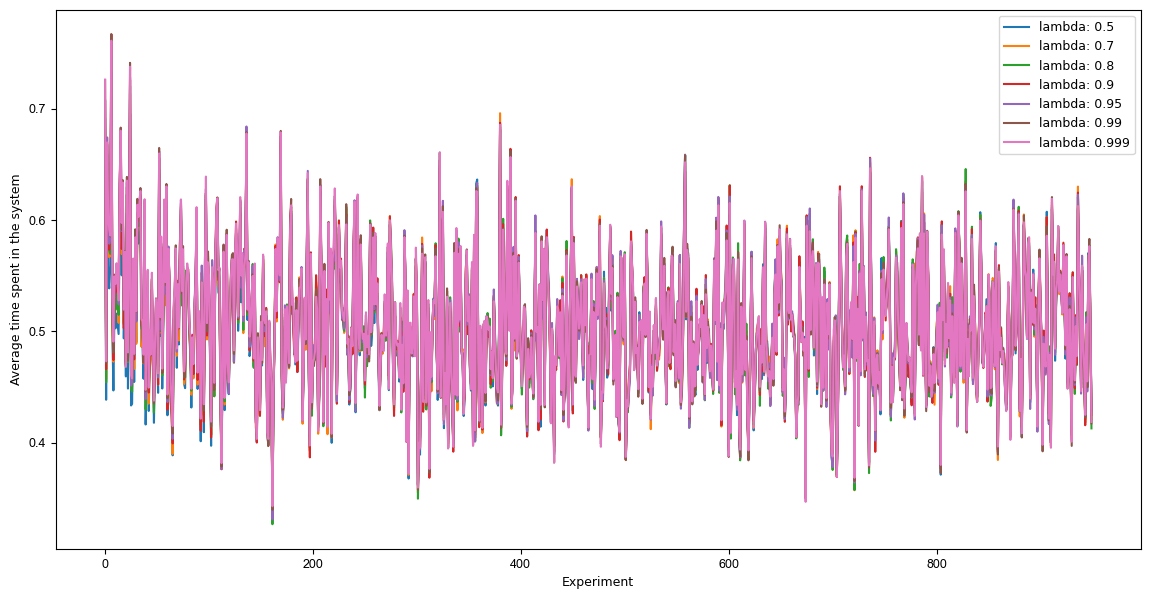

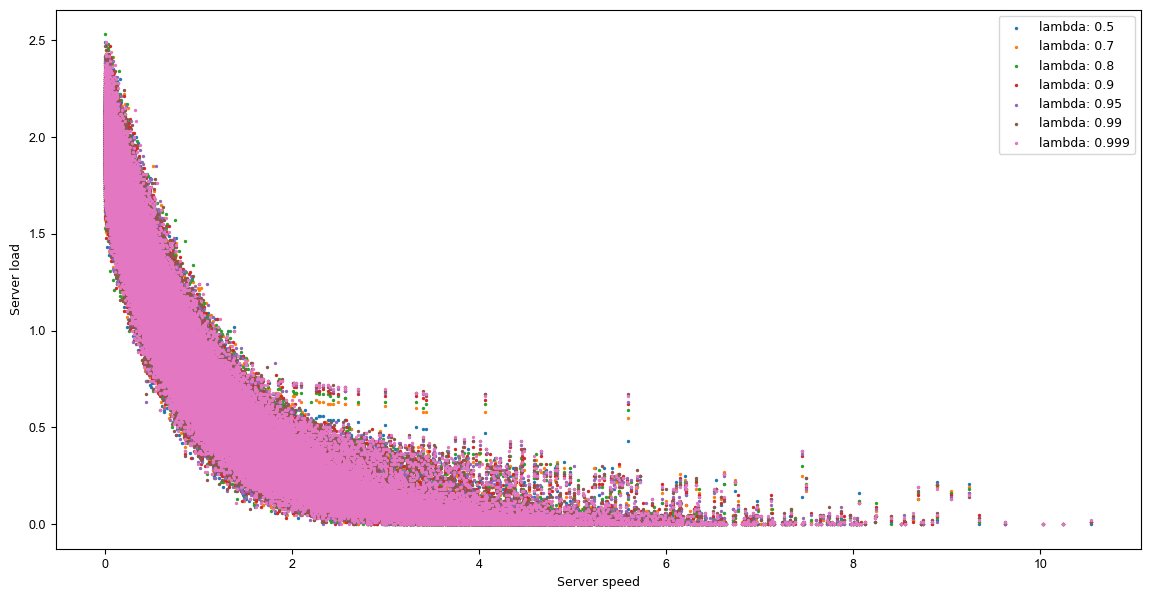

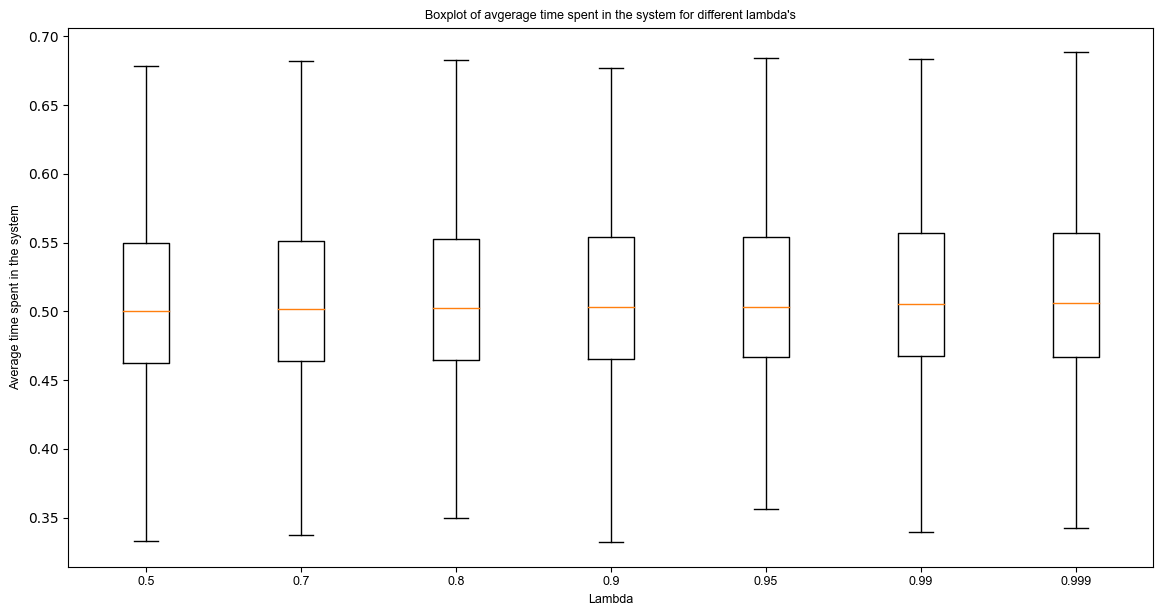

In [198]:
results(read_experiment_data(folder_path, 's2_uss_d2.json'))

#### c) wybór mniej obciążonego z d jednostajnie wybranych serwerów

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |           0.35 |           3.32 |           1.19 |
|          0.7 |           0.36 |           3.51 |           2.40 |
|          0.8 |           0.36 |           3.64 |           3.27 |
|          0.9 |           0.37 |           3.78 |           4.24 |
|         0.95 |           0.37 |           3.84 |           4.71 |
|         0.99 |           0.38 |           3.88 |           5.08 |
|        0.999 |           0.38 |           3.90 |           5.12 |
+--------------+----------------+----------------+----------------+


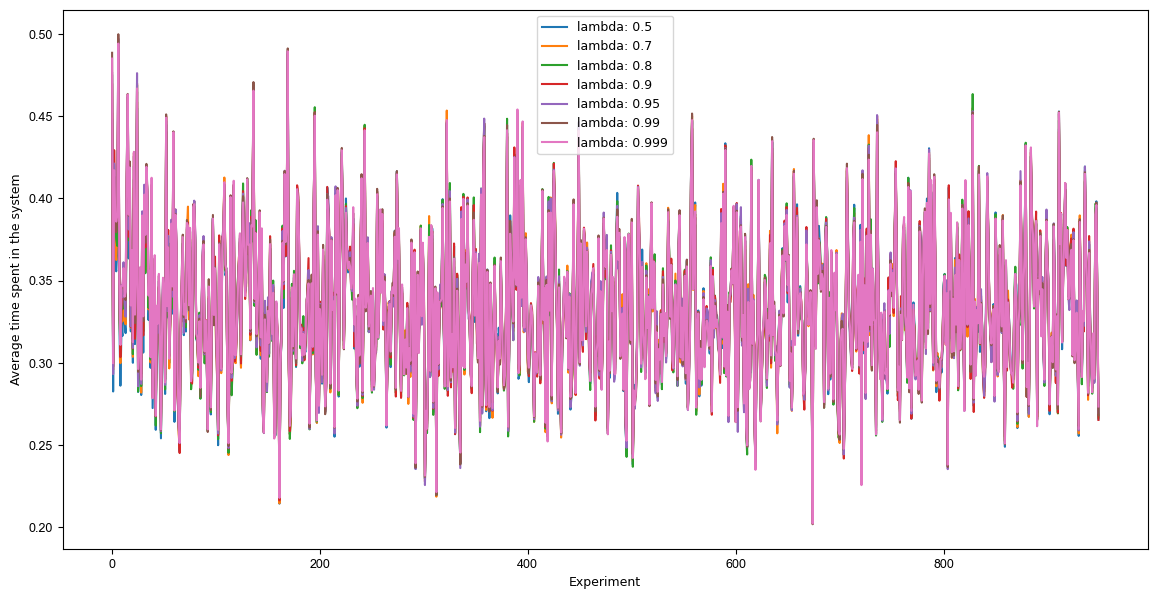

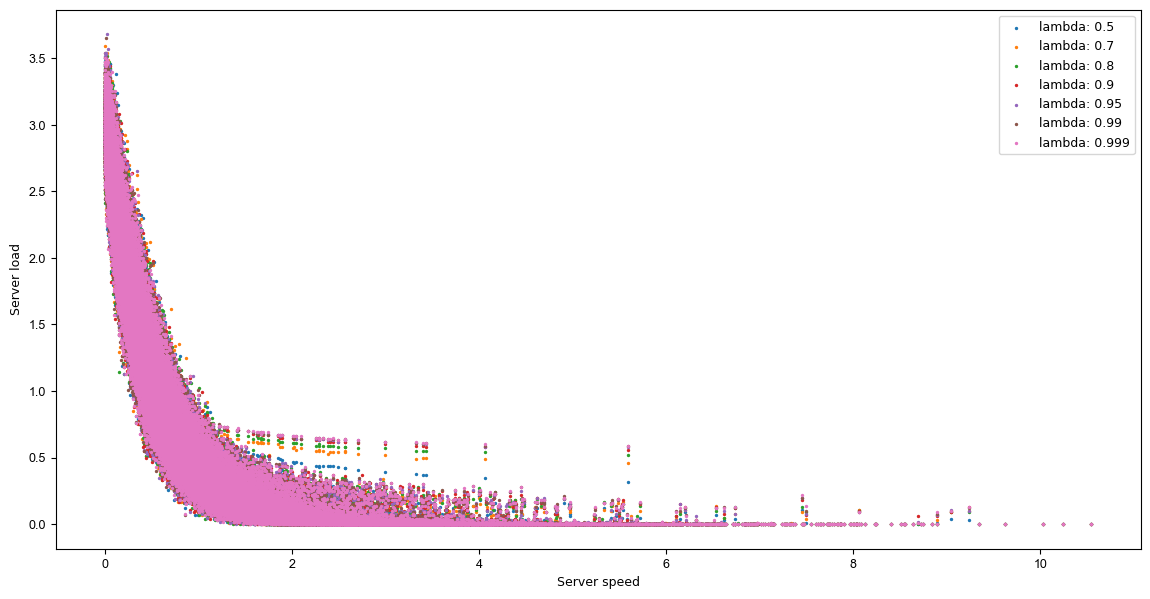

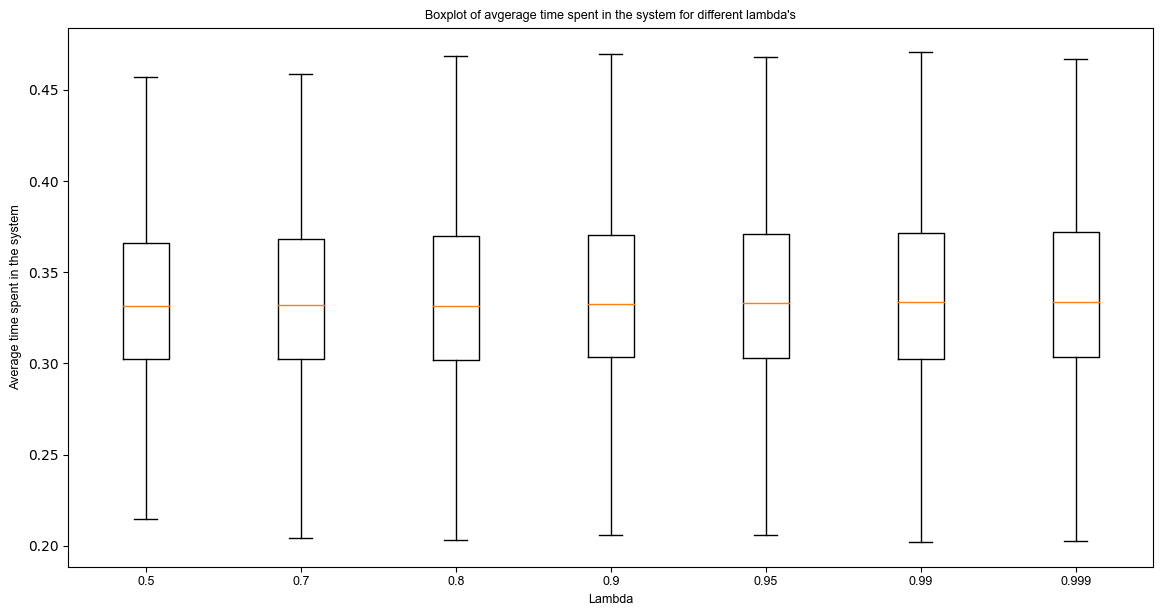

In [199]:
results(read_experiment_data(folder_path, 's2_uss_d3.json'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |           0.20 |           1.97 |           0.56 |
|          0.7 |           0.21 |           2.10 |           1.58 |
|          0.8 |           0.22 |           2.16 |           2.00 |
|          0.9 |           0.22 |           2.21 |           2.37 |
|         0.95 |           0.22 |           2.24 |           2.62 |
|         0.99 |           0.22 |           2.28 |           2.77 |
|        0.999 |           0.22 |           2.28 |           2.83 |
+--------------+----------------+----------------+----------------+


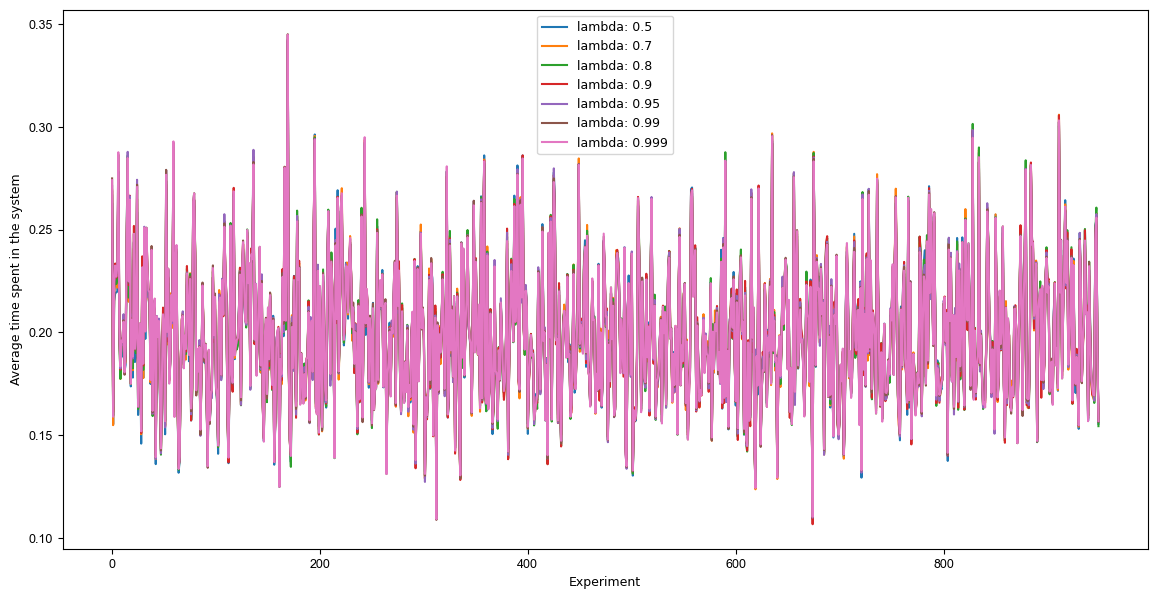

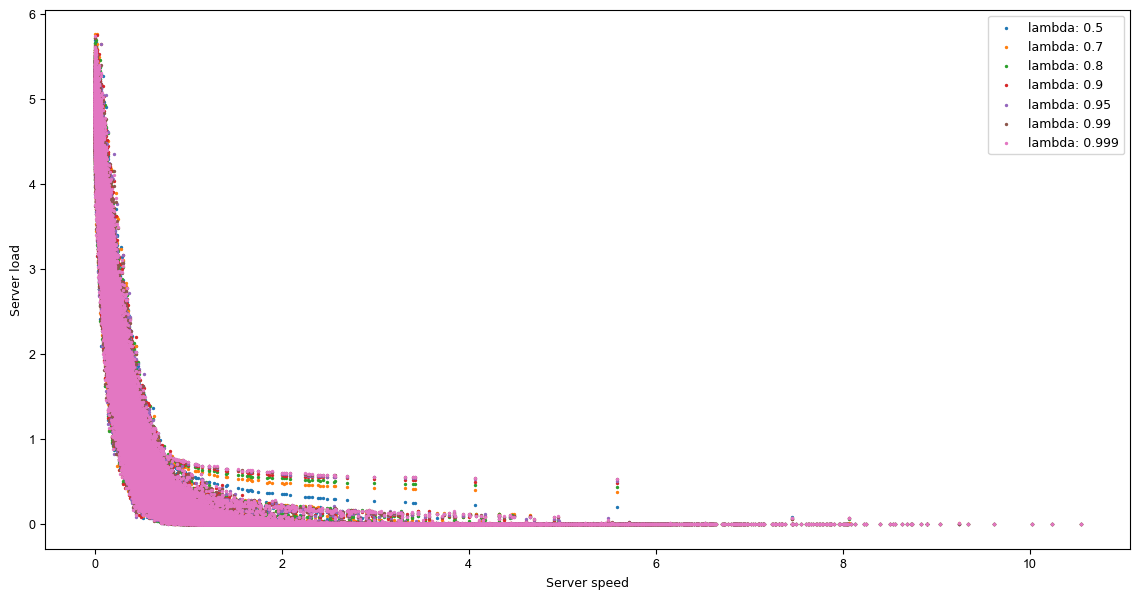

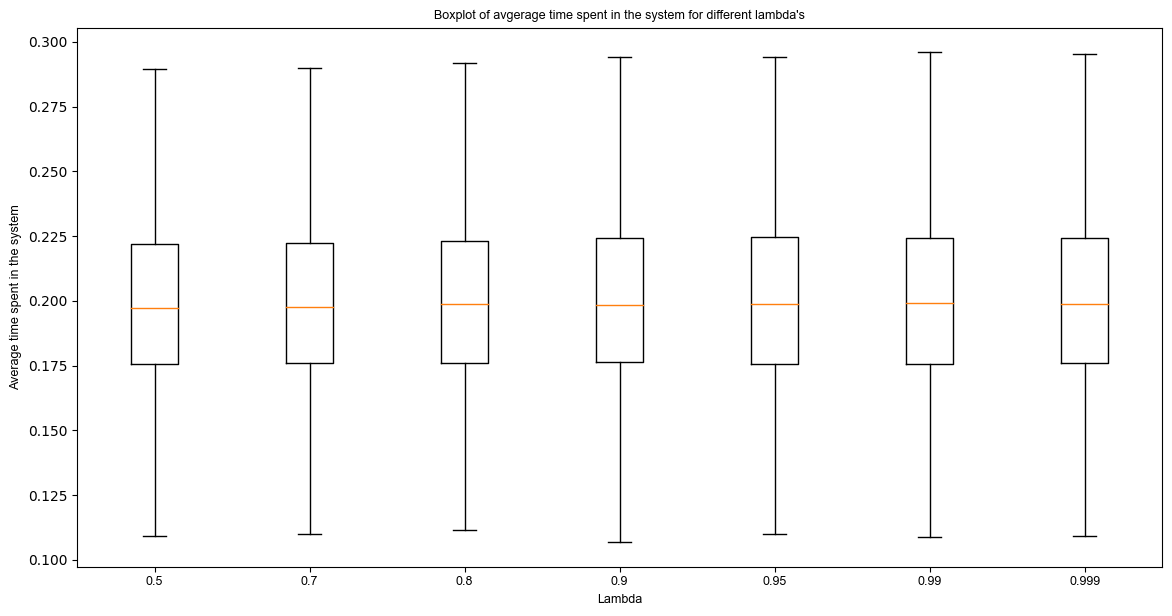

In [200]:
results(read_experiment_data(folder_path, 's2_uss_d5.json'))

#### d) wybór mniej obciążonego z 2 niejednostajnie wybranych serwerów

#### e) wybór mniej obciążonego z d niejednostajnie wybranych serwerów

# Trzeci scenariusz

### Serwery o różnej szybkości, różne zadania

#### a) jednostajny wybór serwera

#### b) wybór mniej obciążonego z 2 jednostajnie wybranych serwerów

#### c) wybór mniej obciążonego z d jednostajnie wybranych serwerów

#### d) wybór mniej obciążonego z 2 niejednostajnie wybranych serwerów

#### e) wybór mniej obciążonego z d niejednostajnie wybranych serwerów

# Combined

In [202]:
print_combined_table(read_all_experiments_data('1.0_100_10000_1000'))

+-----------+--------------+----------------+----------------+----------------+
|  Scenario | Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+-----------+--------------+----------------+----------------+----------------+
|    s1_uss |              |                |                |                |
|           |          0.5 |           2.35 |           4.81 |          25.03 |
|           |          0.7 |           2.61 |           5.96 |          38.13 |
|           |          0.8 |           2.74 |           6.55 |          45.28 |
|           |          0.9 |           2.89 |           7.14 |          52.84 |
|           |         0.95 |           2.96 |           7.43 |          56.65 |
|           |         0.99 |           3.02 |           7.65 |          59.69 |
|           |        0.999 |           3.03 |           7.70 |          60.38 |
|           |              |                |                |                |
| s1_uss_d2 |              |            

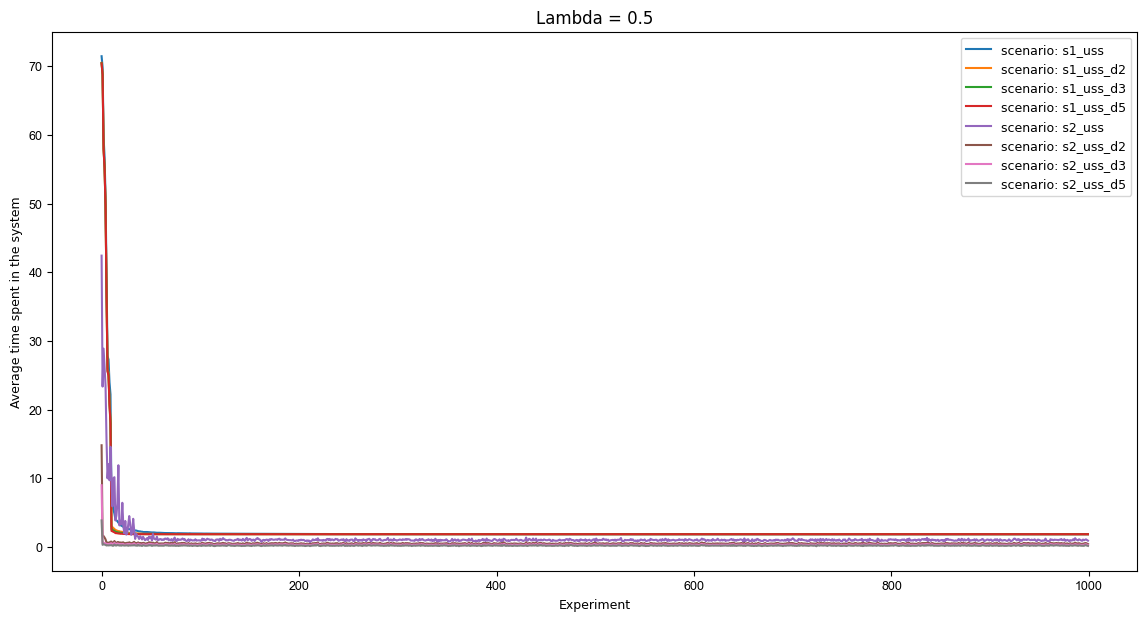

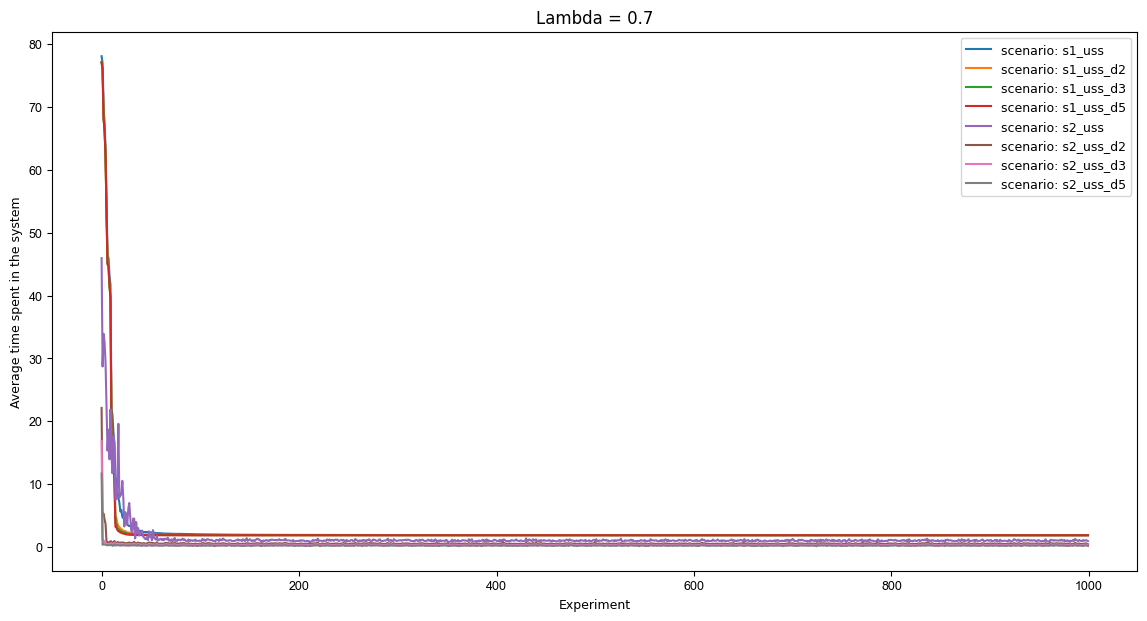

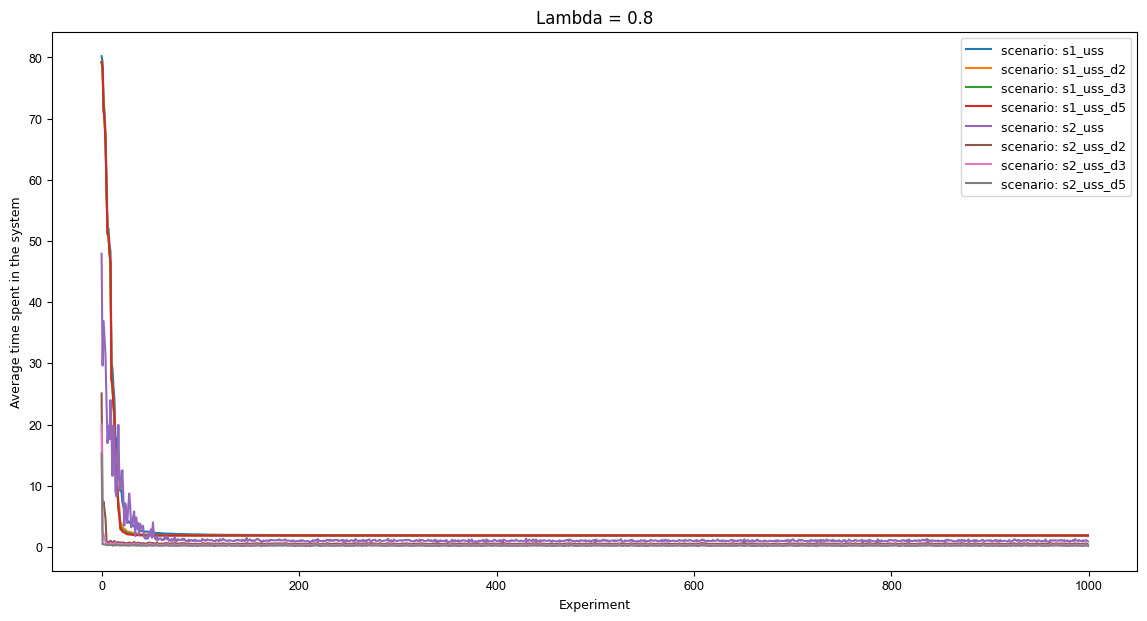

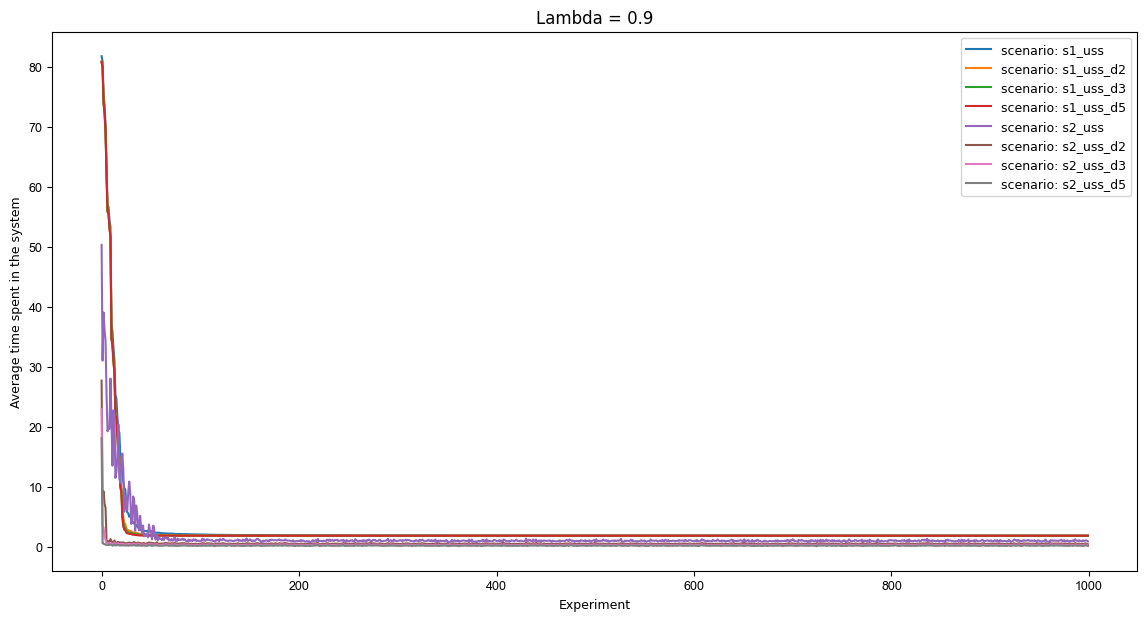

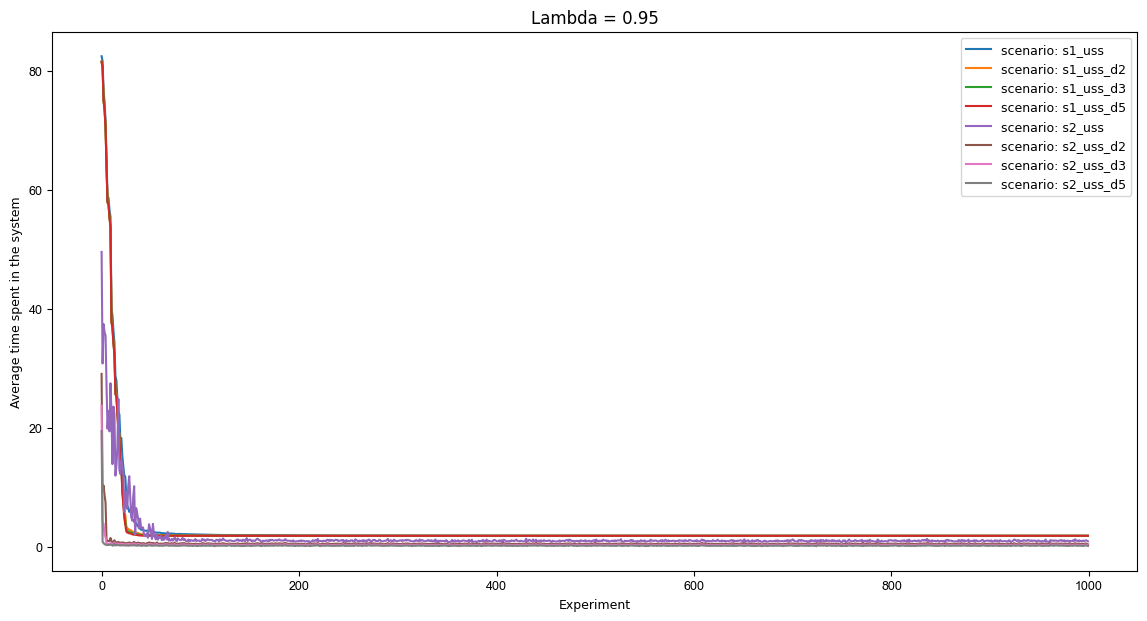

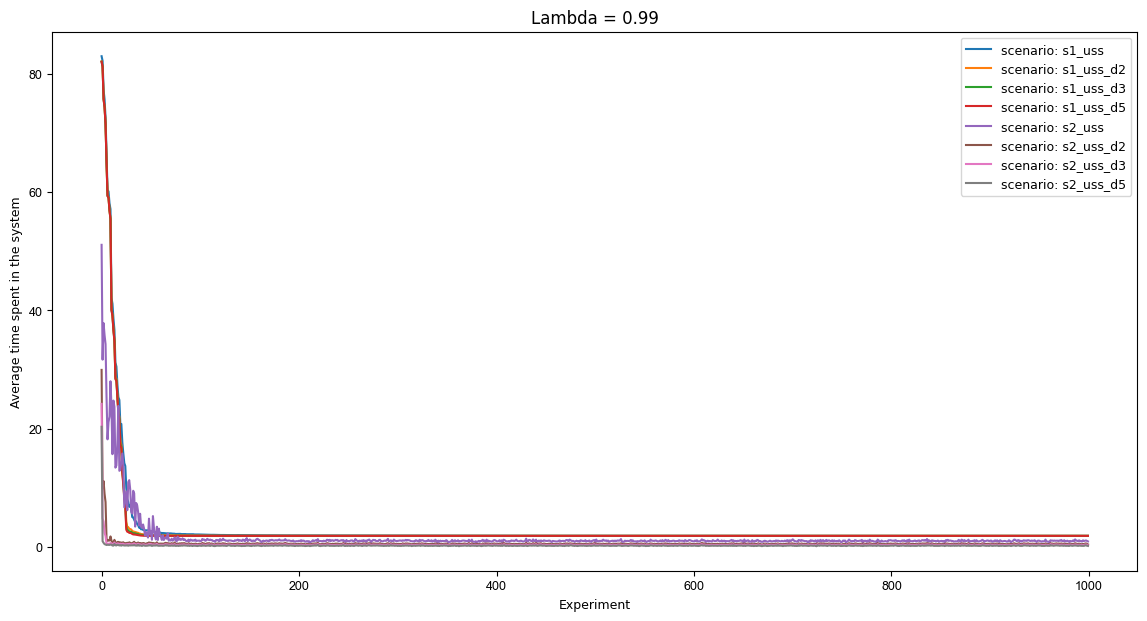

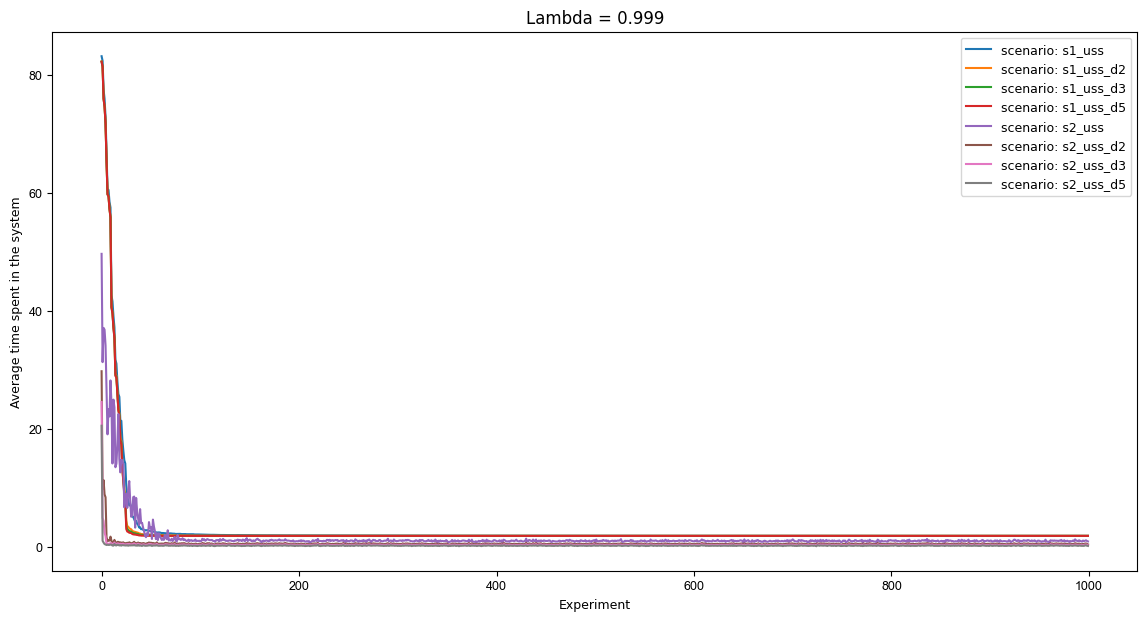

In [205]:
plot_combined(read_all_experiments_data('1.0_100_10000_1000'))